Data Set Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

This analysis's dataset was taken from the healthcare-dataset-stroke-data dataset. Numerous health-related characteristics, including age, gender, heart disease, hypertension, marital status, work type, residence type, average glucose level, and body mass index (BMI), are included in the dataset. The classification objective is to determine if a patient has had a stroke, and this is the target variable.

# What is Classification?

As the name suggests, classification is the process of grouping or classifying objects into various groups or classes according to specific characteristics or features. In machine learning, especially in supervised learning paradigms, it is a fundamental task. In supervised learning, each data point in the training set is labelled with a predefined class or category, and the algorithm uses this information to identify patterns and relationships. (GeeksforGeeks, 2024)

Using the patterns discovered during training, the classification process aims to create a model that can reliably classify new, unknown examples to one of the specified classes. These classes can stand for a variety of results or classifications, such spam versus non-spam emails, benign versus malignant tumours, or, as it relates to us, the presence or absence of stroke in patients based on their health data.

# Appropriateness for Classification:

The dataset is capable of being classified since it contains an array of health-related variables that may affect a person's risk of having a stroke. We can forecast the probability of a stroke in patients by analysing these health markers through the use of machine learning techniques, particularly classification models.

## Analysis Overview:
The primary objective of the investigation is to use the Naïve Bayes Classifier to predict the occurrence of stroke based on health-related data. Specifically, the analysis will involve the following steps:

- Data Preprocessing: The dataset will be preprocessed to manage missing values, normalize numerical features, and encode categorical variables if they are present.

- Feature Selection: Relevant features will be selected based on their importance in predicting the occurrence of stroke.

- Model Training: A subset of the dataset will be used to train the Naïve Bayes Classifier. The performance of the model will be assessed by dividing the dataset into training and testing sets.

- Model Evaluation: The trained model will be evaluated using the testing set. The efficacy of the model in categorizing the occurrence of stroke based on health-related factors will be evaluated by computing the prediction accuracy.

- Result Visualization: Appropriate plots, such as bar graphs and confusion matrices, will be used to visualize the results, including the accuracy of the predictions. These visualizations will shed light on the model's functionality and suggest any possible areas for improvement.

- Impact of Training/Test Splits: The analysis will also take into account how the model's accuracy and predictions are affected by adjusting the training/test splits. This will make it easier to comprehend how resilient the model is to variations in the training data.

Comparison with K-NN Algorithm: Finally, a comparison will be made between the Naïve Bayes Classifier and the K-Nearest Neighbors (K-NN) algorithm's accuracy. Which algorithm performs better at categorizing stroke occurrences according to health-related factors will be demonstrated through this comparison.

# Conclusion:

In conclusion, the goal of this Jupyter Notebook analysis is to employ health-related variables from the healthcare-dataset-stroke-data.csv dataset to predict the occurrence of stroke using the Naïve Bayes Classifier. By performing comprehensive data preprocessing, model training, evaluation, and result visualization, we can gain valuable insights into the factors contributing to stroke and the effectiveness of classification algorithms in predicting its occurrence. Furthermore, contrasting the K-NN algorithm and the Naïve Bayes Classifier will help to clarify how well each performs in this classification task.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

print("This code imports necessary libraries for data analysis")

This code imports necessary libraries for data analysis


In [2]:
# Load the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

print("This code reads a dataset named 'healthcare-dataset-stroke-data.csv' into a pandas DataFrame called 'df'.")

This code reads a dataset named 'healthcare-dataset-stroke-data.csv' into a pandas DataFrame called 'df'.


In [3]:
# Check for missing values
print(df.isnull().sum())

print("\nThis code prints the sum of missing values in each column of the DataFrame 'df'.")

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

This code prints the sum of missing values in each column of the DataFrame 'df'.


In [4]:
# Display the columns of the dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# Display the first 5 rows of the dataset
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
# Finding categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
target_variable = 'stroke'
print('These are the {} categorical variables: \n'.format(len(categorical)))
print(categorical)
# Print the target variable
print('\nThe target variable is: ', target_variable)

These are the 5 categorical variables: 

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

The target variable is:  stroke


In [7]:
# Data Preprocessing
# Handling missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

print("\nThe code fills any missing values in the 'bmi' column of the DataFrame 'df' with the mean value of the 'bmi' column.\n")



The code fills any missing values in the 'bmi' column of the DataFrame 'df' with the mean value of the 'bmi' column.



In [8]:
# Encoding categorical variables
label_encoders = {}
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    
# The code encodes categorical variables by using LabelEncoder to transform each specified column ('gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status') into numerical values, and stores the LabelEncoder objects in a dictionary for later use.

In [9]:
# Defining features and target variable
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

print("\nThe code defines the features and target variable for the model. X contains the DataFrame 'df' with the 'id' and 'stroke' columns dropped, while y contains the 'stroke' column.\n")


The code defines the features and target variable for the model. X contains the DataFrame 'df' with the 'id' and 'stroke' columns dropped, while y contains the 'stroke' column.



In [10]:
# ***************************************************************************************
#    Title: Machine Learning - Train/Test
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 18 May 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_train_test.asp
#
# ***************************************************************************************

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nThe code splits the dataset into training and testing sets, with 30% of the data used for testing and a random state of 42 for reproducibility.\n")


The code splits the dataset into training and testing sets, with 30% of the data used for testing and a random state of 42 for reproducibility.



In [11]:
# ***************************************************************************************
#    Title: Machine Learning - Train/Test
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 18 May 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_train_test.asp
#
# ***************************************************************************************

# Normalizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nThe code normalizes numerical features by scaling the training data 'X_train' and test data 'X_test' using the StandardScaler.\n")


The code normalizes numerical features by scaling the training data 'X_train' and test data 'X_test' using the StandardScaler.



In [12]:
# Model Training and Evaluation: Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

print("\nModel Training and Evaluation: Naive Bayes Classifier\n# The code initializes a Naive Bayes classifier, trains it using the training data, and then uses it to make predictions on the test data.\n")


Model Training and Evaluation: Naive Bayes Classifier
# The code initializes a Naive Bayes classifier, trains it using the training data, and then uses it to make predictions on the test data.



In [13]:
# Evaluating Naive Bayes Classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

In [14]:
print("Naive Bayes Classifier Accuracy: {:.2f}%".format(accuracy_nb * 100))

Naive Bayes Classifier Accuracy: 86.50%


In [15]:
print("Confusion Matrix:\n", cm_nb)

Confusion Matrix:
 [[1290  154]
 [  53   36]]


In [16]:
print("Classification Report:\n", report_nb)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93      1444
           1       0.19      0.40      0.26        89

    accuracy                           0.86      1533
   macro avg       0.58      0.65      0.59      1533
weighted avg       0.92      0.86      0.89      1533



In [17]:
# Model Training and Evaluation: K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

print("\nModel Training and Evaluation: K-Nearest Neighbors Classifier\n# The code initializes a K-Nearest Neighbors classifier, trains it using the training data, and then uses it to make predictions on the test data.\n")


Model Training and Evaluation: K-Nearest Neighbors Classifier
# The code initializes a K-Nearest Neighbors classifier, trains it using the training data, and then uses it to make predictions on the test data.



In [18]:
# Evaluating K-Nearest Neighbors Classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

In [19]:
print("K-Nearest Neighbors Classifier Accuracy: {:.2f}%".format(accuracy_knn * 100))

K-Nearest Neighbors Classifier Accuracy: 94.06%


In [20]:
print("Confusion Matrix:\n", cm_knn)

Confusion Matrix:
 [[1441    3]
 [  88    1]]


In [21]:
print("Classification Report:\n", report_knn)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.25      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.60      0.50      0.50      1533
weighted avg       0.90      0.94      0.91      1533



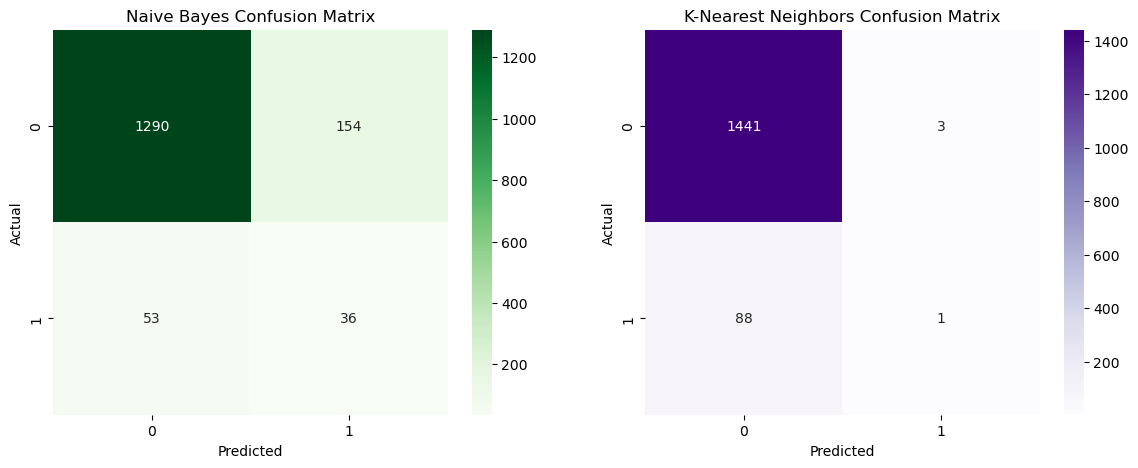

In [22]:
# ***************************************************************************************
#    Title: Confusion Matrix in Machine Learning
#    Author: GeeksforGeeks
#    Date Published: 13 May 2024
#    Date Retrieved: 19 May 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
#
# ***************************************************************************************

# Visualizing Results
# Plotting Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples', ax=ax[1])
ax[1].set_title('K-Nearest Neighbors Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

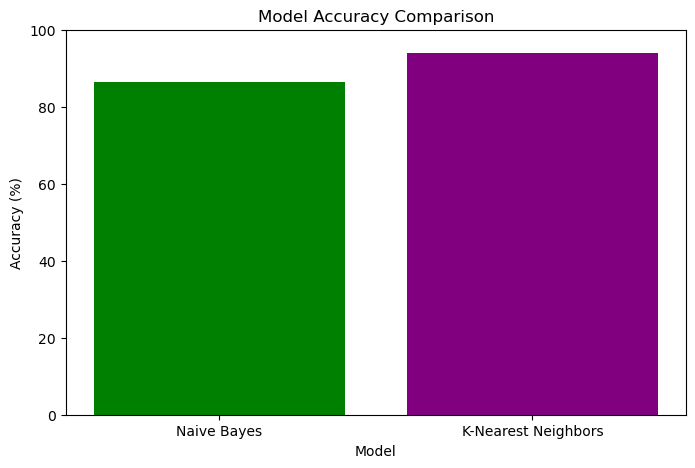

In [23]:
# ***************************************************************************************
#    Title: Bar Plot in Python – How to compare Groups visually
#    Author: Venmani A D
#    Date Published: 2024
#    Date Retrieved: 19 May 2024
#    Code version: 1
#    Availability: https://www.machinelearningplus.com/plots/bar-plot-in-python/
#
# ***************************************************************************************

# Plotting Accuracy Comparison
models = ['Naive Bayes', 'K-Nearest Neighbors']
accuracies = [accuracy_nb * 100, accuracy_knn * 100]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['green', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
plt.show()

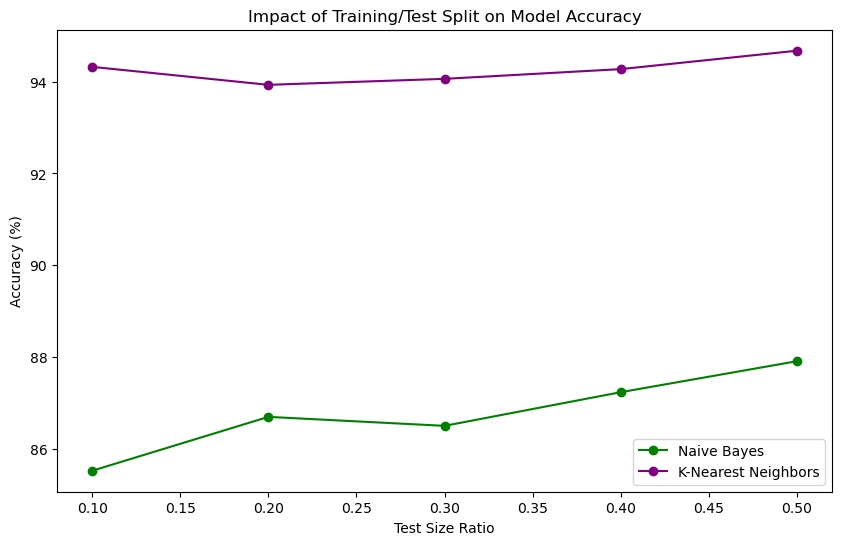

The code evaluates the impact of different training/test split ratios (0.1, 0.2, 0.3, 0.4, and 0.5) on the accuracy of two machine learning models, Naive Bayes and K-Nearest Neighbors (KNN). It trains the models using varying ratios of training and testing data, calculates their accuracies, and plots the results on a graph to visualize how the accuracy changes with different split ratios.


In [24]:
# ***************************************************************************************
#    Title: Custom Legends with Matplotlib
#    Author: Venmani A D
#    Date Published: 07 December 2023
#    Date Retrieved: 22 May 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/custom-legends-with-matplotlib/
#
# ***************************************************************************************

# Impact of Training/Test Splits
split_ratios = [0.1, 0.2, 0.3, 0.4, 0.5]
nb_accuracies = []
knn_accuracies = []

for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    nb_classifier.fit(X_train, y_train)
    y_pred_nb = nb_classifier.predict(X_test)
    nb_accuracies.append(accuracy_score(y_test, y_pred_nb) * 100)

    knn_classifier.fit(X_train, y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    knn_accuracies.append(accuracy_score(y_test, y_pred_knn) * 100)

plt.figure(figsize=(10, 6))
plt.plot(split_ratios, nb_accuracies, marker='o', label='Naive Bayes', color='green')
plt.plot(split_ratios, knn_accuracies, marker='o', label='K-Nearest Neighbors', color='purple')
plt.xlabel('Test Size Ratio')
plt.ylabel('Accuracy (%)')
plt.title('Impact of Training/Test Split on Model Accuracy')
plt.legend()
plt.show()

print ("The code evaluates the impact of different training/test split ratios (0.1, 0.2, 0.3, 0.4, and 0.5) on the accuracy of two machine learning models, Naive Bayes and K-Nearest Neighbors (KNN). It trains the models using varying ratios of training and testing data, calculates their accuracies, and plots the results on a graph to visualize how the accuracy changes with different split ratios.")

# Bibliography
- FEDESORIANO. (2021, January 26). Stroke Prediction Dataset. Retrieved from Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download
- GeeksforGeeks. (2024, January 24). Getting started with Classification. Retrieved May 16, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/getting-started-with-classification/